<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/Code/train_ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

SyntaxError: ignored

In [2]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (247/247), done.
remote: Total 309 (delta 134), reused 188 (delta 53), pack-reused 0
Receiving objects: 100% (309/309), 76.25 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Checking out files: 100% (169/169), done.


In [3]:
pip install -q -U keras-tuner

     |████████████████████████████████| 102kB 6.3MB/s 


In [4]:
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *


In [5]:
# import matplotlib.pyplot as plt
# import pandas as pd
import os 
from google.colab import files
# from pandas import read_csv
# from pandas import DataFrame
# import numpy as np
# from numpy import mean
# from numpy import std
# from numpy import array
# from numpy import vstack
# from numpy import dstack
# from numpy import unique
# from scipy import stats
# from matplotlib import pyplot
# from tensorflow import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers import LSTM
# from keras.layers import TimeDistributed
# from keras.layers import ConvLSTM2D
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical
import keras_tuner
# from keras_tuner import HyperModel
# from keras.callbacks import EarlyStopping
# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.metrics import plot_confusion_matrix
# import seaborn as sns

In [6]:
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [7]:
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

INPUT_SHAPE=(n_timesteps,n_features)

# reshape into subsequences (samples, time steps, rows, cols, channels)
trainX = trainX.reshape((trainX.shape[0], n_steps, 1, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, 1, n_length, n_features))

Num_Epochs_Search = 2
Num_Epochs_Fit = 2
Max_Trials = 5
Num_K_Folds = 5
Model_Name_ConvLSTM = "ConvLSTM"
batch_size = 64

X_ConvLSTM = np.concatenate((trainX, testX),axis=0)
y_ConvLSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [8]:
Best_HP_ConvLSTM, Best_Epoch_ConvLSTM= K_Fold_CV(X_ConvLSTM,
                                                              y_ConvLSTM,
                                                              ConvLSTM,
                                                              Model_Name_ConvLSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.8671116232872009

Best val_accuracy So Far: 0.8901699185371399
Total elapsed time: 00h 00m 51s
INFO:tensorflow:Oracle triggered exit
[The tuned hyperparemters]: {'num_filters': 64, 'dropout_1': 0.5, 'units': 512, 'dense_activation': 'sigmoid', 'dropout_2': 0.0, 'learning_rate': 0.01000000000000001}
Epoch 1/2
206/206 [==============================] - 4s 14ms/step - loss: 0.4003 - accuracy: 0.8542 - val_loss: 0.2867 - val_accuracy: 0.8865
Epoch 2/2
206/206 [==============================] - 3s 13ms/step - loss: 0.1687 - accuracy: 0.9358 - val_loss: 0.3364 - val_accuracy: 0.8708
Best epoch: 1
65/65 [==============================] - 0s 6ms/step - loss: 0.3339 - accuracy: 0.9267
Fold number 5 is done
Accuracy of each fold - [0.9359223246574402, 0.9024271965026855, 0.9470874071121216, 0.8427184224128723, 0.9266634583473206]
Avg accuracy : 0.9109637618064881


In [9]:
Best_HP_ConvLSTM.get_config()['values']

{'dense_activation': 'relu',
 'dropout_1': 0.0,
 'dropout_2': 0.5,
 'learning_rate': 0.01,
 'num_filters': 16,
 'units': 512}

Epoch 1/2
184/184 [==============================] - 7s 29ms/step - loss: 0.4245 - accuracy: 0.8347 - val_loss: 0.9769 - val_accuracy: 0.8566
Epoch 2/2
184/184 [==============================] - 5s 30ms/step - loss: 0.1856 - accuracy: 0.9361 - val_loss: 0.4549 - val_accuracy: 0.8946


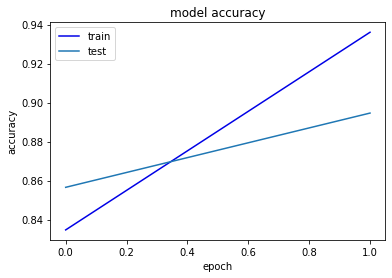

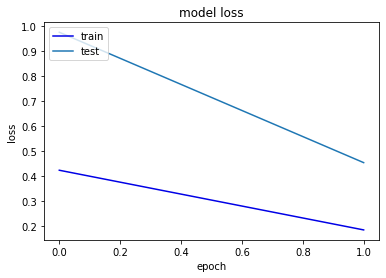

The accureay of the model is 0.884628415107727


In [10]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelConvLSTM, ConvLSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_ConvLSTM,
                               ConvLSTM,
                               Best_Epoch_ConvLSTM,
                               batch_size)


In [11]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(ConvLSTM_accuracy * 10000))

In [13]:
# save the model by using the unique file name (model name + accuracy)
BestModelConvLSTM.save("/content/CrispCerebella/Models/Final_Model_ConvLSTM_" + file_name_ending)

INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/assets


INFO:tensorflow:Assets written to: /content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/assets


In [15]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/saved_model.pb (deflated 89%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/variables/variables.index (deflated 63%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_ConvLSTM_8846/keras_metadata.pb (deflated 80%)


In [18]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}.zip -d /Test

Archive:  /content/CrispCerebella/Models/Final_Model_LSTM.zip
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/.ipynb_checkpoints/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/saved_model.pb  
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.data-00000-of-00001  
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/variables/variables.index  
   creating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/assets/
  inflating: /Test/content/CrispCerebella/Models/Final_Model_LSTM/keras_metadata.pb  


In [ ]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_ConvLSTM_{file_name_ending}')

In [ ]:
# evaluate the saved model
# test_model.evaluate(testX, testy)

93/93 [==============================] - 3s 30ms/step - loss: 0.8421 - accuracy: 0.6491


[0.8420565724372864, 0.6491346955299377]